<a href="https://colab.research.google.com/github/SplitImages/website/blob/gh-pages/Stat_probablity_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률분포

##### 확률분포
- 분포
    - 일정한 범위 안에 흩어져 퍼져있는 정도
- 확률변수
    - Random variable, 확률현상에 기인해 결과값이 확률적으로 정해지는 변수
    - 확률 현상 : 어떤 결과들이 나올지 알지만, 가능한 결과들 중 어떤 결과가 나올지 모르는 현상
- 확률분포
    - 어떤 확률변수가 취할 수 있는 모든 값들과 그 값을 취할 확률의 대응관계로 표시하는 것
    - 예시) 동전을 2번 던질때 앞면이 나온 회수
    
![image.png](attachment:image.png)

##### 확률분포에서 많이 쓰이는 Scipy 함수

- pmf : 확률질량함수(probability mass function)

- pdf : 확률밀도함수(probability density function)

- cdf : 누적분포함수(cumulative distribution function)

- ppf : 누적분포함수의 역함수(inverse cumulative distribution function)

- rvs : 랜덤 표본 생성(random variable sampling)

##### Scipy 설치
- `!pip install scipy`

- `python.exe -m pip install --upgrade pip`




In [1]:
#한글처리

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

[]

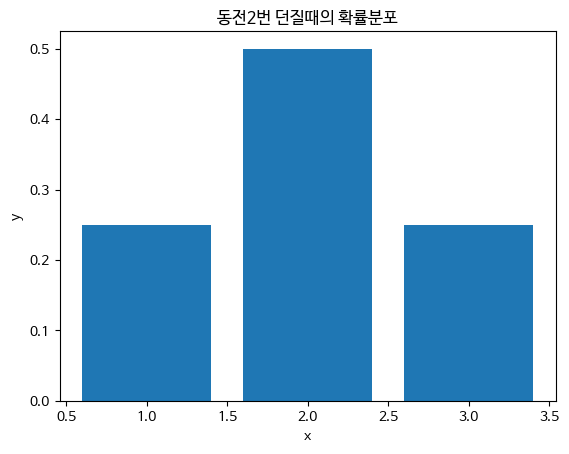

In [4]:
p = [1/4, 1/2,1/4]
x = [1,2,3]
plt.bar(x, p)
plt.xlabel('x')
plt.ylabel('y')
plt.title('동전2번 던질때의 확률분포')  # PMF(Probability Mass Function 확률 질량 함수)
plt.plot()

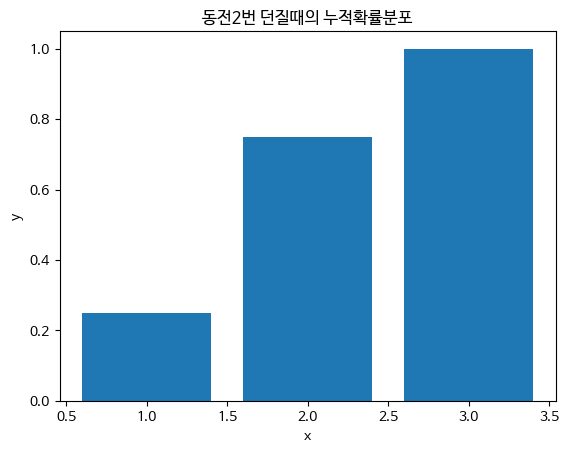

In [5]:
import numpy as np
plt.bar(x, np.cumsum(p))
plt.xlabel('x')
plt.ylabel('y')
plt.title('동전2번 던질때의 누적확률분포')
plt.show()
#CDF(Cumulative Distribution Function 누적 분포 함수)

#### 01.이산형 확률분포
- 01. 베르누이 분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli

In [6]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

In [7]:
p = 0.3   #확률
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print(f'mean:{mean}')
print(f'var:{var}')
print(f'skew:{skew}')
print(f'kurt:{kurt}')

mean:0.3
var:0.21
skew:0.8728715609439694
kurt:-1.2380952380952381


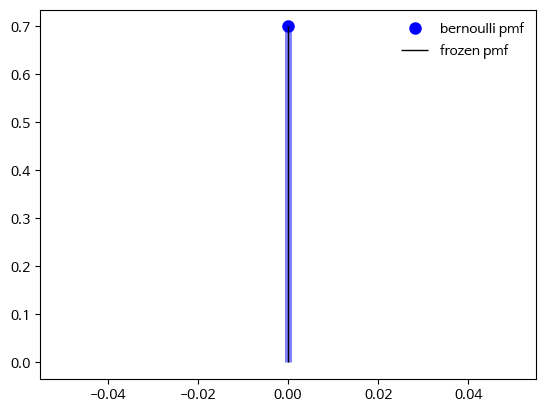

In [8]:
fig, ax = plt.subplots(1, 1)
x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [9]:
print(f'베르누이 분포에서 mean과 variance : {bernoulli.stats(p)}')  # 베르누이 분포에서 mean, variance 값
print(f'베르누이 분포에서 0.01이 되는 확률변수값 : {bernoulli.ppf(0.01, p)}')  # 베르누이 분포에서 0.01이 되는 확률변수값
print(f'베르누이 분포에서 0.99이 되는 확률변수값 : {bernoulli.ppf(0.99, p)}')  # 베르누이 분포에서 0.99이 되는 확률변수값
print(f'베르누이 확률질량함수에서 x에서의 확률값: {bernoulli.pmf(x, p)}')     #확률질량함수
print(f'베르누이 누적확률함수에서 x에서의 누적확률값 : {bernoulli.cdf(x, p)}')   #누적확률함수
prob = bernoulli.cdf(x, p)  # 0.7
print(f'''베르누이 분포에서 'ppf를 이용하여 {prob}확률을 가지는 확률변수 x값'과 '원래x값'이 같은지 :
    {np.allclose(x, bernoulli.ppf(prob, p))}''')  # 두 행렬이 element-wise하게 같은지 비교

베르누이 분포에서 mean과 variance : (0.3, 0.21)
베르누이 분포에서 0.01이 되는 확률변수값 : 0.0
베르누이 분포에서 0.99이 되는 확률변수값 : 1.0
베르누이 확률질량함수에서 x에서의 확률값: [0.7]
베르누이 누적확률함수에서 x에서의 누적확률값 : [0.7]
베르누이 분포에서 'ppf를 이용하여 [0.7]확률을 가지는 확률변수 x값'과 '원래x값'이 같은지 :
    True


##### 연습문제

1. 동전을 던져서 앞면이 나올 확률은 1/2 이다. 이 베르누이 분포의 평균과 분산을 구하세요.
2. 위의 동전문제에서 확률이 0.99가 되는 확률변수 X 값?


In [10]:
# 1. 동전을 던져서 앞면이 나올 확률은 1/2 이다. 이 베르누이 분포의 평균과 분산을 구하세요.
# code here
bernoulli.stats(1/2)


(0.5, 0.25)

In [11]:
# 2. 위의 동전문제에서 확률이 0.99가 되는 확률변수 X 값?
# code here
bernoulli.ppf(0.99, 0.5)

1.0

- 2. 이항분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom

In [12]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [14]:
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print(f'mean:{mean}')
print(f'var:{var}')
print(f'skew:{skew}')
print(f'kurt:{kurt}')

mean:2.0
var:1.2
skew:0.18257418583505533
kurt:-0.3666666666666668


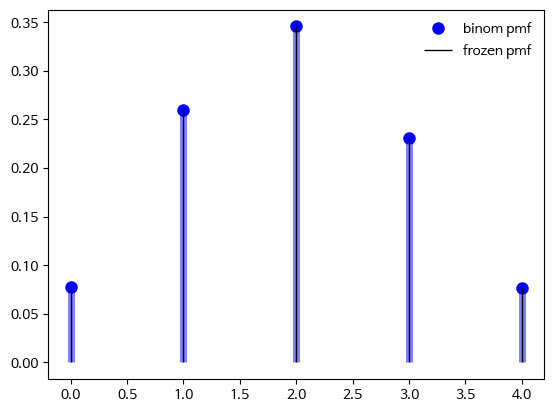

In [15]:
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [16]:
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
x

array([0., 1., 2., 3., 4.])

In [ ]:
print(f'이항 분포에서 mean과 variance : {binom.stats(n, p)}')             # 이항분포에서 mean, variance 값
print(f'이항 분포에서 0.01이 되는 확률변수값 : {binom.ppf(0.01,n, p)}')    # 이항 분포에서 0.01이 되는 확률변수값
print(f'이항 분포에서 0.99이 되는 확률변수값 : {binom.ppf(0.99,n, p)}')    # 이항 분포에서 0.99이 되는 확률변수값
print(f'이항 확률질량함수에서 x에서의 확률값: {binom.pmf(x, n, p)}')        #확률질량함수
print(f'이항 누적확률함수에서 x에서의 누적확률값 : {binom.cdf(x, n, p)}')   #누적확률함수
prob = binom.cdf(x, n, p)
print(f'''이항 분포에서 <ppf를 이용하여 {prob}확률을 가지는 확률변수 x값>과 <원래x값>이 같은지 :
    {np.allclose(x, binom.ppf(prob, n, p))}''')                      # 두 행렬이 element-wise하게 같은지 비교

이항 분포에서 mean과 variance : (2.0, 1.2)
이항 분포에서 0.01이 되는 확률변수값 : 0.0
이항 분포에서 0.99이 되는 확률변수값 : 5.0
이항 확률질량함수에서 x에서의 확률값: [0.07776 0.2592  0.3456  0.2304  0.0768 ]
이항 누적확률함수에서 x에서의 누적확률값 : [0.07776 0.33696 0.68256 0.91296 0.98976]
이항 분포에서 <ppf를 이용하여 [0.07776 0.33696 0.68256 0.91296 0.98976]확률을 가지는 확률변수 x값>과 <원래x값>이 같은지 : 
    True


In [17]:
# cdf와 ppf가 정확한지 체크
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

##### 연습문제
- 1.동전을 50번 던져서 앞면이 나오는 경우의 이항분포를 사용하여 평균과 분산을 구하세요.
- 2.위 확률분포를 시각화 하세요.
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p)) 로 구하세요.

In [18]:
### 1번문제
# code here

binom.stats(50, 1/2)

(25.0, 12.5)

In [19]:
# 힌트
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
x
binom.pmf(x, 50, 0.5)

array([8.88178420e-16, 4.44089210e-14, 1.08801856e-12, 1.74082970e-11,
       2.04547490e-10])

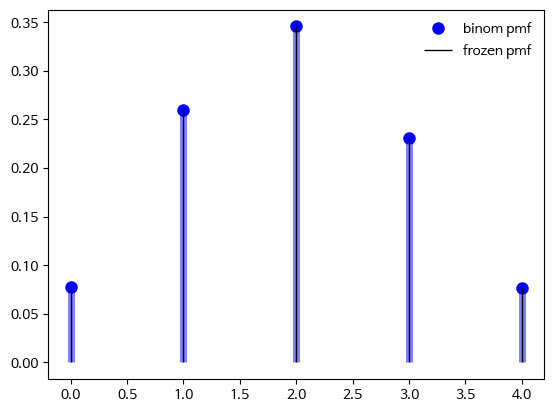

In [20]:
### 2번문제
fig, ax = plt.subplots(1, 1)
# code here

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

- 3. 기하분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom

In [21]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt

In [22]:
p = 0.5
mean, var, skew, kurt = geom.stats(p, moments='mvsk')
print(f'mean:{mean}')
print(f'var:{var}')
print(f'skew:{skew}')
print(f'kurt:{kurt}')

mean:2.0
var:2.0
skew:2.1213203435596424
kurt:6.5


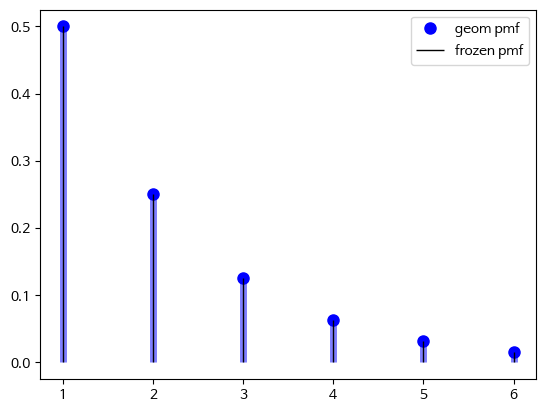

In [23]:
fig, ax = plt.subplots(1, 1)

x = np.arange(geom.ppf(0.01, p),
              geom.ppf(0.99, p))
ax.plot(x, geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

rv = geom(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
ax.legend()
plt.show()


In [24]:
# Check accuracy of cdf and ppf
prob = geom.cdf(x, p)
np.allclose(x, geom.ppf(prob, p))
True

True

In [25]:
# 기하분포를 따르는 랜덤값 생성
r = geom.rvs(p, size=1000)
r

array([ 2,  1,  2,  1,  1,  2,  3,  5,  3,  2,  5,  1,  1,  1,  1,  1,  3,
        1,  1,  1,  6,  3,  2,  5,  1,  4,  3,  2,  5,  5,  2,  2,  2,  3,
        1,  2,  1,  1,  2,  1,  1,  1,  5,  1,  3,  1,  1,  2,  1,  2,  2,
        1,  2,  1,  1,  3,  2,  2,  1,  6,  1,  1,  1,  5,  3,  1,  1,  4,
        1,  1,  3,  1,  1,  2,  1,  1,  8,  1,  2,  2,  1,  4,  2,  1,  2,
        1,  3,  2,  2,  2,  4,  1,  3,  2,  1,  3,  3,  1,  2,  3,  2,  1,
        1,  1,  2,  3,  1,  1,  3,  1,  2,  1,  3,  1,  1,  3,  1,  2,  2,
        1,  3,  1,  1,  1,  1,  1,  1,  4,  1,  1,  2,  2,  1,  1,  2,  1,
        2,  3,  1,  1,  2,  1,  1,  3,  1,  2,  1,  1,  1,  1,  4,  1,  1,
        3,  2,  4,  1,  3,  1,  1,  2,  1,  2,  2,  3,  1,  1,  2,  4,  1,
        2,  3,  1,  4,  2,  2,  2,  1,  4,  3,  2,  5,  3,  1,  1,  3,  1,
        4,  1,  1,  3,  6,  1,  1,  2,  1,  1,  1,  1,  1,  5,  2,  1,  1,
        2,  1,  4,  3,  1,  2,  2,  2,  1,  1,  4,  3,  4,  2,  1,  1,  1,
        1,  1,  1,  5,  1

In [ ]:
x

array([1., 2., 3., 4., 5., 6.])

In [26]:
print(f'기하 분포에서 mean과 variance : {geom.stats(p)}')             # 기하 분포에서 mean, variance 값
print(f'기하 분포에서 0.01이 되는 확률변수값 : {geom.ppf(0.01,p)}')    # 기하 분포에서 0.01이 되는 확률변수값
print(f'기하 분포에서 0.99이 되는 확률변수값 : {geom.ppf(0.99,p)}')    # 기하 분포에서 0.99이 되는 확률변수값
print(f'기하 확률질량함수에서 X에서의 확률값: {geom.pmf(x, p)}')        # 확률질량함수
print(f'기하 누적확률함수에서 X에서의 누적확률값 : {geom.cdf(x, p)}')   # 누적확률함수
prob = geom.cdf(x,p)
print(f'''기하 분포에서 <ppf를 이용하여 {prob}확률을 가지는 확률변수 x값>과 <원래 확률변수 X값>이 같은지 :
    {np.allclose(x, geom.ppf(prob, p))}''')                      # 두 행렬이 element-wise하게 같은지 비교
# ppf 는 cdf의 역함수 관계

기하 분포에서 mean과 variance : (2.0, 2.0)
기하 분포에서 0.01이 되는 확률변수값 : 1.0
기하 분포에서 0.99이 되는 확률변수값 : 7.0
기하 확률질량함수에서 X에서의 확률값: [0.5      0.25     0.125    0.0625   0.03125  0.015625]
기하 누적확률함수에서 X에서의 누적확률값 : [0.5      0.75     0.875    0.9375   0.96875  0.984375]
기하 분포에서 <ppf를 이용하여 [0.5      0.75     0.875    0.9375   0.96875  0.984375]확률을 가지는 확률변수 x값>과 <원래 확률변수 X값>이 같은지 :
    True


##### 연습문제
- 1. A야구선수의 홈런 칠 확률이 5%일때, 이 선수가 x번째 타석에서 홈런 칠 확률 분포는 아래와 같다. 위 선수가 5번째 타석에서 홈런칠 확률은?
![image.png](attachment:image.png)

In [27]:
# code here
geom.pmf(5, 0.05)

0.0407253125

- 4. 포아송분포

In [28]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [29]:
mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print(f'mean:{mean}')
print(f'var:{var}')
print(f'skew:{skew}')
print(f'kurt:{kurt}')

mean:0.6
var:0.6
skew:1.2909944487358056
kurt:1.6666666666666667


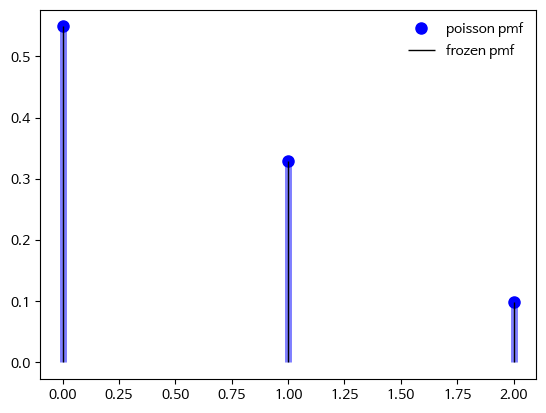

In [30]:
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [31]:
print(f'포아송 분포에서 mean과 variance : {poisson.stats(mu)}')             # 포아송 분포에서 mean, variance 값
print(f'포아송 분포에서 0.01이 되는 확률변수값 : {poisson.ppf(0.01,mu)}')    # 포아송 분포에서 0.01이 되는 확률변수값
print(f'포아송 분포에서 0.99이 되는 확률변수값 : {poisson.ppf(0.99,mu)}')    # 포아송 분포에서 0.99이 되는 확률변수값
print(f'포아송 확률질량함수에서 x에서의 확률값: {poisson.pmf(x, mu)}')        # 확률질량함수
print(f'포아송 누적확률함수에서 x에서의 누적확률값 : {poisson.cdf(x, mu)}')   # 누적확률함수
prob = poisson.cdf(x,mu)  # 0.7
print(f'''포아송 분포에서 <ppf를 이용하여 {prob}확률을 가지는 확률변수 x값>과 <원래x값>이 같은지 :
    {np.allclose(x, poisson.ppf(prob, mu))}''')                      # 두 행렬이 element-wise하게 같은지 비교

포아송 분포에서 mean과 variance : (0.6, 0.6)
포아송 분포에서 0.01이 되는 확률변수값 : 0.0
포아송 분포에서 0.99이 되는 확률변수값 : 3.0
포아송 확률질량함수에서 x에서의 확률값: [0.54881164 0.32928698 0.09878609]
포아송 누적확률함수에서 x에서의 누적확률값 : [0.54881164 0.87809862 0.97688471]
포아송 분포에서 <ppf를 이용하여 [0.54881164 0.87809862 0.97688471]확률을 가지는 확률변수 x값>과 <원래x값>이 같은지 :
    True


##### 연습문제
- 1. 고속도로에서 하루동안 대형 교통사고가 2회 발생한다. 이때 하루동안 고속도로에서 대형 교통사고가 3번 발생할 확률은?
- 2. 1번의 포아송 분포의 결과를 시각화하세요.

In [36]:
# 1. 고속도로에서 하루동안 대형 교통사고가 2회 발생한다. 이때 하루동안 고속도로에서 대형 교통사고가 3번 발생할 확률은?
# code here
mu = 2

poisson.pmf(3,mu)

#정답: 0.18044704

0.18044704431548356

In [39]:
x

array([0., 1., 2.])

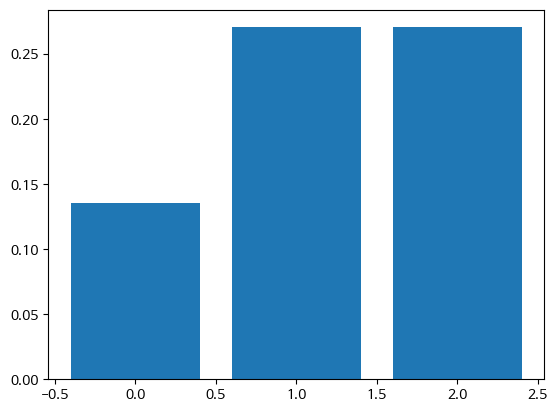

In [42]:
# 2. 1번의 포아송 분포의 결과를 시각화하세요.  힌트> plt.bar( ) 막대그래프를 이용하세요.
# code here

plt.bar(x, poisson.pmf(x,mu))
plt.show()


#### 02.연속확률분포
- 1.균등분포 Uniform distribution
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform

In [43]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [44]:
mean, var, skew, kurt = uniform.stats(moments='mvsk')
print(f'mean:{mean}')
print(f'var:{var}')
print(f'skew:{skew}')
print(f'kurt:{kurt}')

mean:0.5
var:0.08333333333333333
skew:0.0
kurt:-1.2


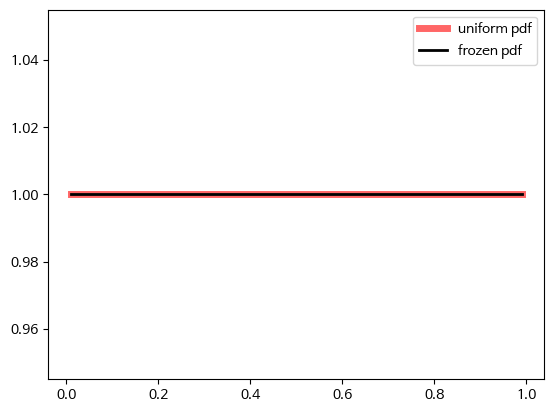

In [45]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')
rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.legend()

In [ ]:
#Check accuracy of cdf and ppf
vals = uniform.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))
True

True

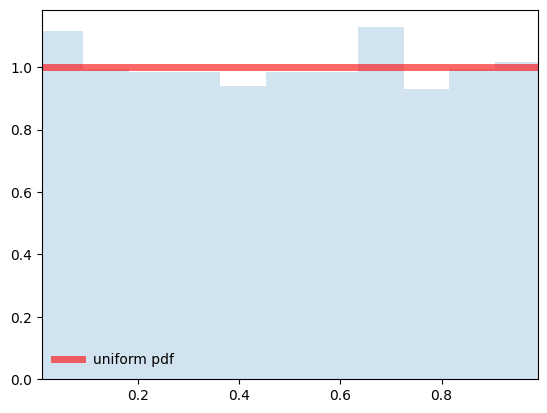

In [ ]:
# 랜덤값 1000개 생성후 pdf와 히스토그램 비교
fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')
r = uniform.rvs(size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
q = [0.001, 0.5, 0.999]
vals = uniform.ppf([0.001, 0.5, 0.999])

print(f'균등분포에서 mean과 variance : {uniform.stats()}')             # 균등 분포에서 mean, variance 값
print(f'균등 분포에서 0.01이 되는 확률변수값 : {uniform.ppf(0.01)}')    # 균등 분포에서 0.01이 되는 확률변수값
print(f'균등 분포에서 0.99이 되는 확률변수값 : {uniform.ppf(0.99)}')    # 균등 분포에서 0.99이 되는 확률변수값
print(f'균등분포 확률밀도함수에서 x에서의 확률값: {uniform.pdf(q)}')        # 확률밀도함수
print(f'균등분포 누적확률함수에서 x에서의 누적확률값 : {uniform.cdf(vals)}')    # 누적확률함수

print(f'''균등 분포에서 <ppf를 이용하여 {[0.001, 0.5, 0.999]}값을 가지는 X값>과 <확률변수 x의 cdf 확률값>이 같은지 :
    {np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))}''')                      # 두 행렬이 element-wise하게 같은지 비교

균등분포에서 mean과 variance : (0.5, 0.08333333333333333)
균등 분포에서 0.01이 되는 확률변수값 : 0.01
균등 분포에서 0.99이 되는 확률변수값 : 0.99
균등분포 확률밀도함수에서 x에서의 확률값: [1. 1. 1.]
균등분포 누적확률함수에서 x에서의 누적확률값 : [0.001 0.5   0.999]
균등 분포에서 <ppf를 이용하여 [0.001, 0.5, 0.999]값을 가지는 확률값>과 <확률변수 x의 cdf 확률값>이 같은지 : 
    True


##### 연습문제
- 1. 확률변수 X ~ Uiform(50, 70) 이라면 P(X>=65 | X<=55) 를 구하세요.

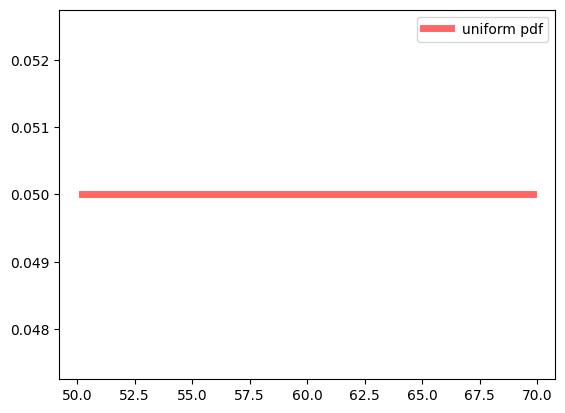

In [ ]:
# 힌트
fig, ax = plt.subplots(1, 1)
myuni = uniform(50, 20)    #[loc, loc + scale]
x = np.linspace(myuni.ppf(0.01), myuni.ppf(0.99), 100)
ax.plot(x, myuni.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')
ax.legend()

In [46]:
# 1. 확률변수 X ~ Uiform(50, 70) 이라면 P(X>=65 | X<=55) 를 구하세요.
# coding here
my = uniform(50, 20)    #[loc, loc + scale]
my.cdf(55) - my.cdf(50) + my.cdf(70) - my.cdf(65)

0.5

- 2.지수분포
-   pdf = lambda * exp(-lambda * x)
-   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon

In [ ]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

In [ ]:
mean, var, skew, kurt = expon.stats(moments='mvsk')
print(f'mean:{mean}')
print(f'var:{var}')
print(f'skew:{skew}')
print(f'kurt:{kurt}')

mean:1.0
var:1.0
skew:2.0
kurt:6.0


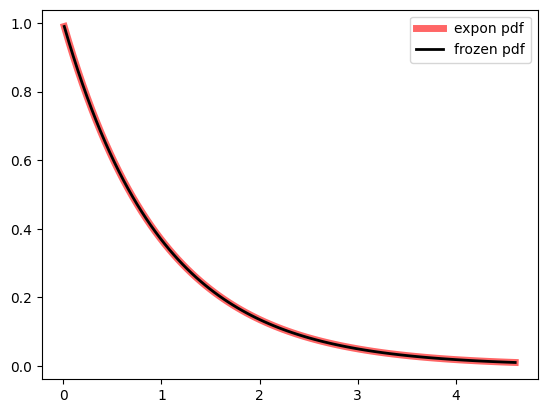

In [ ]:
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
plt.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')

rv = expon()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.legend()

In [ ]:
vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

True

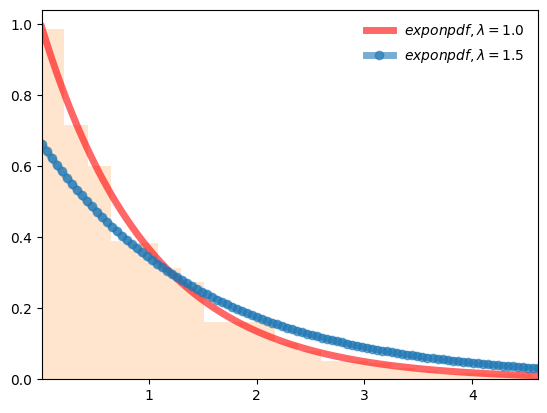

In [ ]:
r = expon.rvs(size=1000)
plt.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='$expon pdf, \lambda=1.0$')
plt.plot(x, expon.pdf(x, 0, 1.5),'o-', lw=5, alpha=0.6, label='$expon pdf, \lambda=1.5$')

plt.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.xlim([x[0], x[-1]])
plt.legend(loc='best', frameon=False)
plt.show()

##### 연습문제
- 1. 전자 제품의 5년간 고장횟수가 평균 1회일 때, 1년 안에 고장 날 확률

In [ ]:
#힌트!  cdf(x, loc, scale)를 이용하세요.  loc =0, scale = 1/lambda

# code here

0.18126924692201815

- 03. 정규분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

In [47]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [48]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(f'mean:{mean}')
print(f'var:{var}')
print(f'skew:{skew}')
print(f'kurt:{kurt}')

mean:0.0
var:1.0
skew:0.0
kurt:0.0


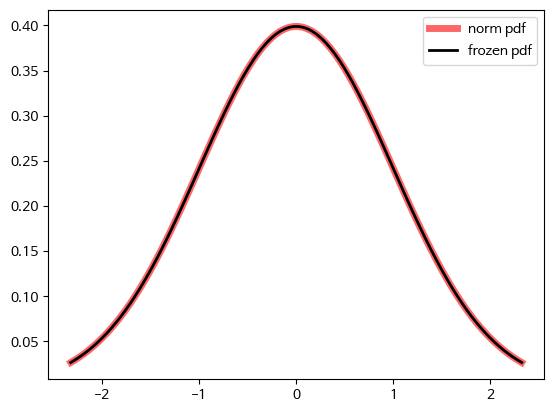

In [49]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.legend()

In [50]:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
# vals

True

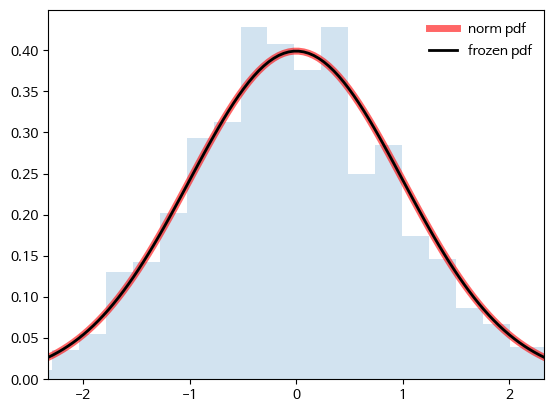

In [51]:
# 랜덤하게 1000개 생성후 pdf와 히스토그램 비교
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = norm.rvs(size=1000, random_state=0)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [52]:
q = [0.001, 0.5, 0.999]
vals = norm.ppf([0.001, 0.5, 0.999])

print(f'정규 분포에서 mean과 variance : {norm.stats()}')             # 정규 분포에서 mean, variance 값
print(f'정규 분포에서 0.01이 되는 확률변수값 : {norm.ppf(0.01)}')    # 정규 분포에서 0.01이 되는 확률변수값
print(f'정규 분포에서 0.99이 되는 확률변수값 : {norm.ppf(0.99)}')    # 정규 분포에서 0.99이 되는 확률변수값
print(f'정규분포 확률밀도함수에서 x에서의 확률값: {norm.pdf(q)}')        # 확률밀도함수
print(f'정규분포 누적확률함수에서 x에서의 누적확률값 : {norm.cdf(vals)}')    # 누적확률함수

print(f'''정규 분포에서 <ppf를 이용하여 {[0.001, 0.5, 0.999]}값을 가지는 X값>과 <확률변수 x의 cdf 확률값>이 같은지 :
    {np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))}''')                      # 두 행렬이 element-wise하게 같은지 비교

정규 분포에서 mean과 variance : (0.0, 1.0)
정규 분포에서 0.01이 되는 확률변수값 : -2.3263478740408408
정규 분포에서 0.99이 되는 확률변수값 : 2.3263478740408408
정규분포 확률밀도함수에서 x에서의 확률값: [0.39894208 0.35206533 0.2422127 ]
정규분포 누적확률함수에서 x에서의 누적확률값 : [0.001 0.5   0.999]
정규 분포에서 <ppf를 이용하여 [0.001, 0.5, 0.999]값을 가지는 X값>과 <확률변수 x의 cdf 확률값>이 같은지 :
    True


##### 참고
- pdf 인자 > loc : 분포의 기댓값(평균), scale: 분포의 표준편차

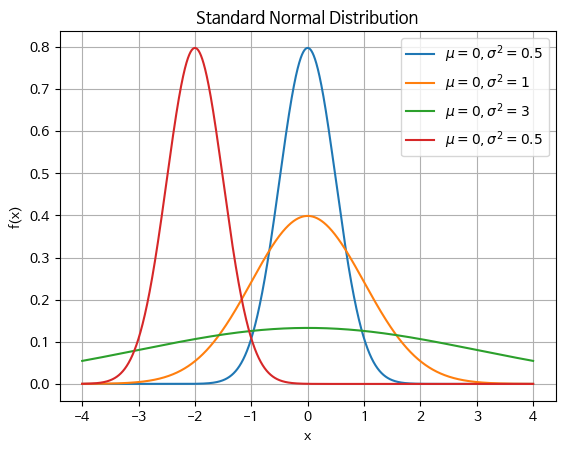

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.arange(-4, 4, 0.001)
plt.plot(x, norm.pdf(x, loc=0, scale=0.5), label='$\mu=0, \sigma^2=0.5$')
plt.plot(x, norm.pdf(x, loc=0, scale=1), label='$\mu=0, \sigma^2=1$')
plt.plot(x, norm.pdf(x, loc=0, scale=3), label='$\mu=0, \sigma^2=3$')
plt.plot(x, norm.pdf(x, loc=-2, scale=0.5), label='$\mu=0, \sigma^2=0.5$')

plt.title("Standard Normal Distribution")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
# cum = np.arange(-1, 1, 0.01) #1
# plt.fill_between(cum, norm.pdf(cum), alpha=0.5, color='g') #2
# pro = norm(0, 1).cdf(1) - norm(0, 1).cdf(-1) #3
# plt.text(0, 0.02, round(pro,2), fontsize=20) #4
plt.show()

##### 연습문제
- 1. N(3, 2^2)의 그래프를 그려보세요.
- 2. 𝑿~𝑵(𝟏𝟎, 𝟐^𝟐)일때, 𝑷(𝟏𝟎 < 𝑿 < 𝟏𝟑)과 𝑷(𝟎 < 𝒁 < 𝟏. 𝟓)의 면적이 같은지 보이세요.
- 3. 표준정규분포에서 P(-0.5≤X≤1)의 확률을 구하세요.
- 4. 누적분포함수를 이용하여 확률이 0.95가 되는 분위수(확률변수 X)를 구하세요.

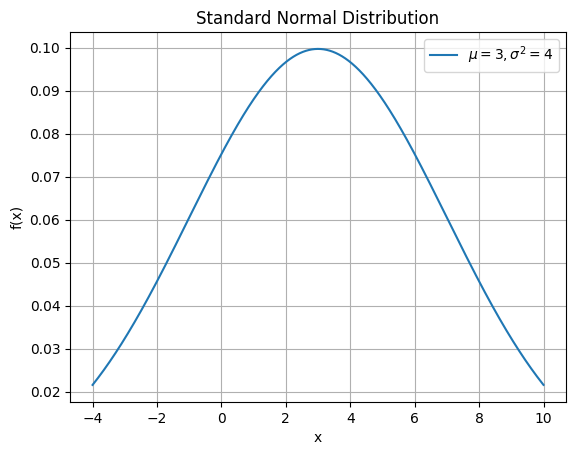

In [ ]:
#1. N(3, 2^2)의 그래프를 그려보세요.
# code here
x = np.arange(-4, 10, 0.001)


- 2. 𝑿~𝑵(𝟏𝟎, 𝟐^𝟐) 일 때, 𝑷(𝟏𝟎 < 𝑿 < 𝟏𝟑)은 표준화 과정을 통해 아래와 같이 변형됩니다.
- 𝑷(𝟎 < 𝒁 < 𝟏. 𝟓), 𝒁~𝑵(𝟎, 𝟏)
- 𝑷(𝟏𝟎 < 𝑿 < 𝟏𝟑)과 𝑷(𝟎 < 𝒁 < 𝟏. 𝟓)의 면적이 같은지 보이세요.



$$P(\frac{10-10}{2} < \frac{2 < x-10}{2}  <  \frac{13-10}{2})$$


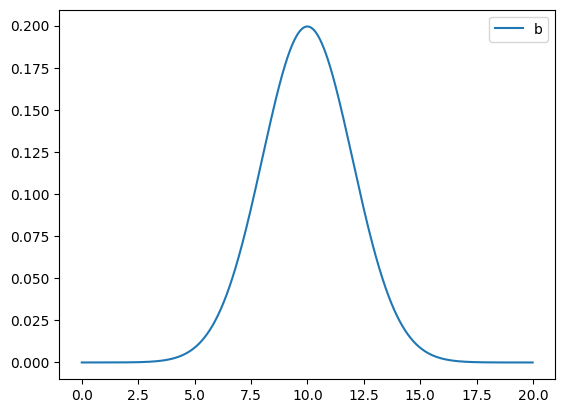

In [ ]:
# 2-1  𝑿~𝑵(𝟏𝟎, 𝟐^2) 의 그래프를 그리세요.

x = np.arange(0, 20, 0.01)
# code here




In [ ]:
#2-2. 𝑷(𝟏𝟎 < 𝑿 < 𝟏𝟑)과 𝑷(𝟎 < 𝒁 < 𝟏. 𝟓)의 면적은 같은지 보이세요.(cdf 함수활용)
# code here

표준화 전 면적(X) : 0.4331927987311419
표준화 후 면적(Z) : 0.4331927987311419


In [ ]:
# 3. 표준정규분포에서 P(-0.5≤X≤1)의 확률을 구하세요.
# coding here



P(-0.5≤X≤1)= 0.532807207342556


In [ ]:
# 4. 누적분포함수를 이용하여 확률이 0.95가 되는 분위수(확률변수 X)를 구하세요.
# coding here




P(t≤k)=0.95, k= 1.6448536269514722


- 분위수
$$ P( Z > Z_{\alpha } ) = \alpha $$
$$ Z_{0.05} = 0.05 = 1.645$$
$$ Z_{0.025} = 0.025 = 1.96 $$
$$ Z_{0.95} = -1.645 $$
$$ Z_{0.975} = -1.96 $$



In [ ]:
print(f'분위수 alpha=0.05  :{norm(0,1).ppf(0.05)}')  # 왼쪽부터 확률계산
print(f'분위수 alpha=0.025 :{norm(0,1).ppf(0.025)}')
print(f'분위수 alpha=0.95  :{norm(0,1).ppf(0.95)}')
print(f'분위수 alpha=0.975 :{norm(0,1).ppf(0.975)}')

분위수 alpha=0.05  :-1.6448536269514729
분위수 alpha=0.025 :-1.9599639845400545
분위수 alpha=0.95  :1.6448536269514722
분위수 alpha=0.975 :1.959963984540054


- 4.중심극한정리
-   표본의 크기가 𝑵인 확률표본의 표본평균은 N이 충분히 크면 근사적으로 정규분포를 따르게 됨
-   모집단의 분포와 상관없이 표본의 크기가 30이상이 되면 𝑵이 커짐에 따라 표본평균의 분포가 정규분포에 근사해 짐
- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=parksehoon1971&logNo=221585313064

In [ ]:
# 주사위를 던져 4가 나오는 이항 분포를 랜덤으로 30개 생성후 그 평균을 구하여 30번 반복후 히스토그램 생성
from numpy import arange, linspace, mean
from scipy.stats import expon, zscore, norm

times = 30
l = 10
loc = 0
m = []

for i in arange(times):
   m.append(np.mean(binom(10, 1/6).rvs(size=30)))
print(f'난수 30개의 평균 : {m}')

z = zscore(m)  #표준화
print(f'표준화된 평균값 : {z}')

난수 30개의 평균 : [1.7333333333333334, 1.4666666666666666, 1.3666666666666667, 1.6, 1.5666666666666667, 1.4, 1.6, 1.6, 1.4666666666666666, 1.7, 1.5666666666666667, 1.6, 1.4, 1.6333333333333333, 1.8, 1.9333333333333333, 1.6666666666666667, 1.7333333333333334, 2.066666666666667, 1.6, 1.7333333333333334, 1.7666666666666666, 1.3, 1.5333333333333334, 1.8, 1.5, 1.3333333333333333, 1.9666666666666666, 1.4333333333333333, 1.2666666666666666]
표준화된 평균값 : [ 0.66526186 -0.71114199 -1.22729344 -0.02294006 -0.19499055 -1.05524295
 -0.02294006 -0.02294006 -0.71114199  0.49321138 -0.19499055 -0.02294006
 -1.05524295  0.14911042  1.00936283  1.69756475  0.3211609   0.66526186
  2.38576668 -0.02294006  0.66526186  0.83731234 -1.5713944  -0.36704103
  1.00936283 -0.53909151 -1.39934392  1.86961523 -0.88319247 -1.74344488]


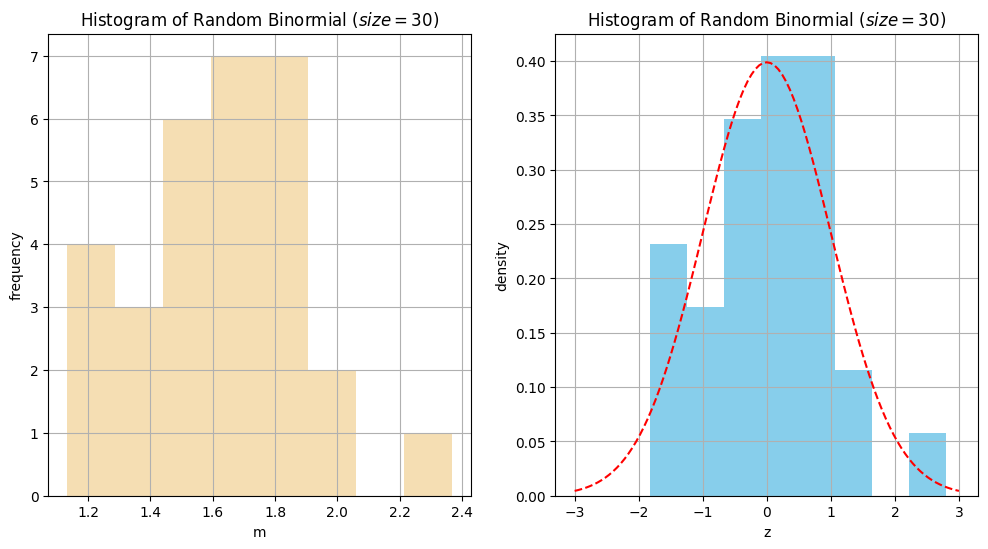

In [ ]:
import matplotlib.pyplot as plt
from math import log10
%matplotlib inline

# 시뮬레이션 함수 생성
def test (times):

    t = times
    l = 10
    loc = 0

    m = []

    for i in arange(t):
       m.append(np.mean(binom(10, 1/6).rvs(size=30)))

    z = zscore(m)

    b = int(6 * log10(t))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(m, bins=b, facecolor='wheat')
    plt.xlabel('m')
    plt.ylabel('frequency')
    plt.title(r'Histogram of Random Binormial ($size = $' + str(t) + ')')
    plt.grid()

    x = linspace(-3, 3, 101)

    plt.subplot(1,2,2)
    plt.hist(z, bins=b, density=True, facecolor='skyblue')
    plt.plot(x, norm(0, 1).pdf(x), 'r--')
    plt.xlabel('z')
    plt.ylabel('density')
    plt.title(r'Histogram of Random Binormial ($size = $' + str(t) + ')')
    plt.grid()

    plt.show()

# 30회 시뮬레이션
test(30)

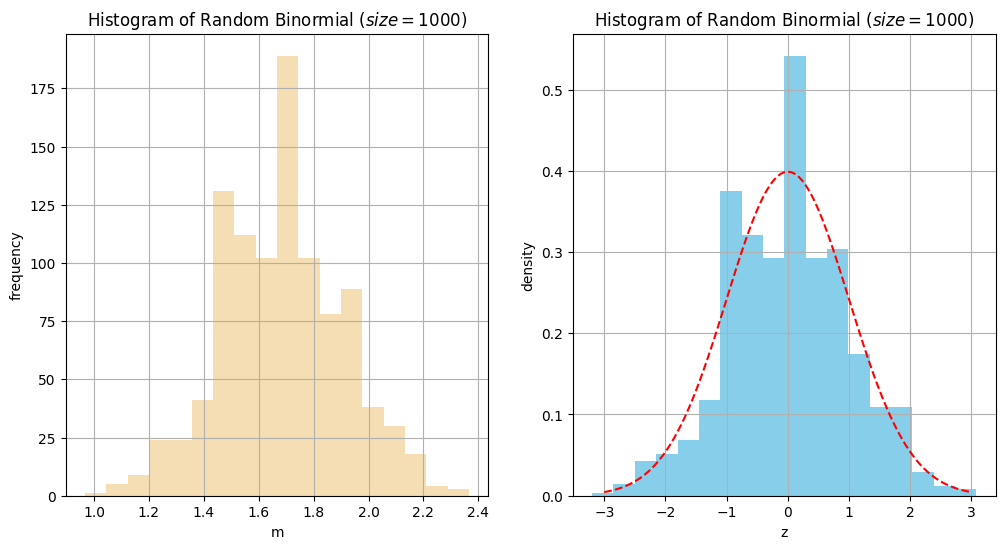

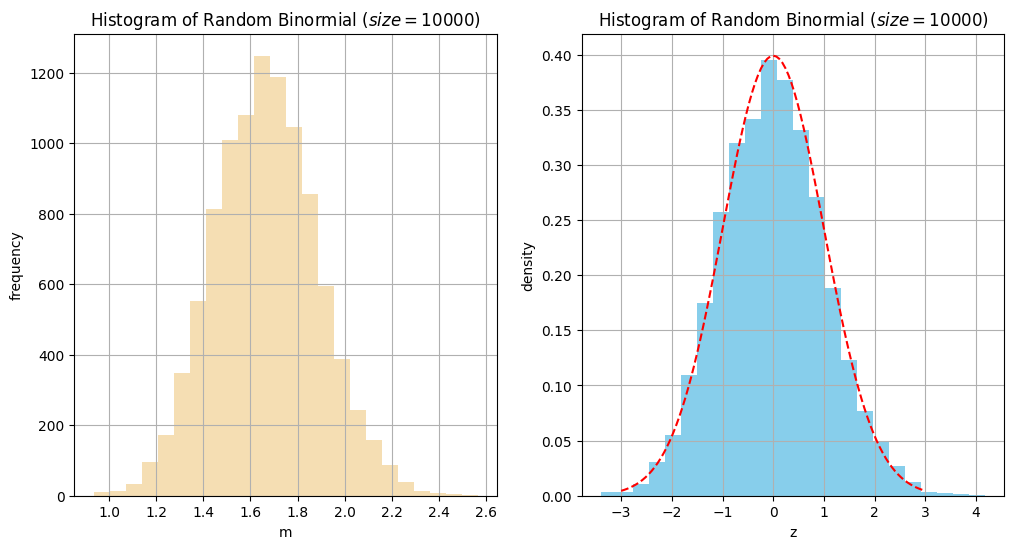

In [ ]:
### 100회, 1000회, 10000회 시뮬레이션 결과를 출력하세요.

# code here


- 5. 카이제곱분포   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare

In [ ]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [ ]:
df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
print(f'mean:{mean}')
print(f'var:{var}')
print(f'skew:{skew}')
print(f'kurt:{kurt}')

mean:55.0
var:110.0
skew:0.3813850356982369
kurt:0.21818181818181817


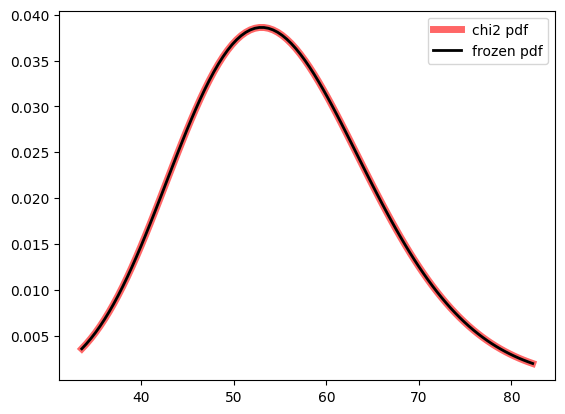

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.legend()


In [ ]:
#Check accuracy of cdf and ppf
vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))

True

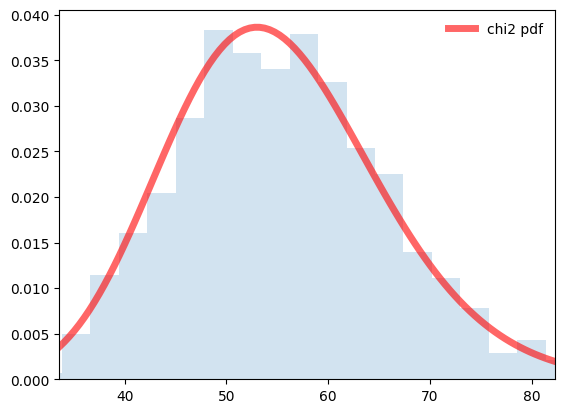

In [ ]:
# random 값 1000개 생성 후 pdf와 히스토그램 비교
fig, ax = plt.subplots(1, 1)
r = chi2.rvs(df, size=1000)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
q = [0.001, 0.5, 0.999]
vals = chi2.ppf(q, df)

print(f'카이제곱분포에서 mean과 variance : {chi2.stats(df)}')             # 카이제곱분포에서 mean, variance 값
print(f'카이제곱에서 0.01이 되는 확률변수값 : {chi2.ppf(0.01,df)}')    # 카이제곱분포에서 0.01이 되는 확률변수값
print(f'카이제곱에서 0.99이 되는 확률변수값 : {chi2.ppf(0.99,df)}')    # 카이제곱분포에서 0.99이 되는 확률변수값
print(f'카이제곱 확률밀도함수에서 x에서의 확률값: {chi2.pdf(q,df)}')        # 확률밀도함수
print(f'카이제곱 누적확률함수에서 x에서의 누적확률값 : {chi2.cdf(vals,df)}')    # 누적확률함수

print(f'''카이제곱분포에서 <ppf를 이용하여 {[0.001, 0.5, 0.999]}확률값을 가지는 X값>과 <확률변수 x의 cdf 확률값>이 같은지 :
    {np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals,df))}''')                      # 두 행렬이 element-wise하게 같은지 비교

카이제곱분포에서 mean과 variance : (55.0, 110.0)
카이제곱에서 0.01이 되는 확률변수값 : 33.57047525100024
카이제곱에서 0.99이 되는 확률변수값 : 82.29211682919967
카이제곱 확률밀도함수에서 x에서의 확률값: [7.98302650e-116 2.07260343e-044 1.49258840e-036]
카이제곱 누적확률함수에서 x에서의 누적확률값 : [0.001 0.5   0.999]
카이제곱분포에서 <ppf를 이용하여 [0.001, 0.5, 0.999]값을 가지는 확률값>과 <확률변수 x의 cdf 확률값>이 같은지 : 
    True


##### 연습문제
1. 자유도 10인 카이제곱분포에 대해서 P(-2≤ X ≤2)의 확률을 계산하세요.
2. 카이제곱분포에 대한 누적분포함수를 이용하여 확률이 0.95가 되는 분위수(확률변수 X)를 구하세요.

In [ ]:
# 1. 자유도 10인 카이제곱분포에 대해서 P(-2≤ X ≤2)의 확률을 계산하세요.
# code here



P(-2≤X≤2)= 0.003659846827343713


In [ ]:
# 2. 카이제곱분포에 대한 누적분포함수를 이용하여 확률이 0.95가 되는 분위수(확률변수 X)를 구하세요.
# code here



P(t≤k)=0.95, k= 18.307038053275146


- 6. t분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t

In [ ]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

In [ ]:
df = 3
mean, var = t.stats(df, moments='mv')
print(f'mean:{mean}')
print(f'var:{var}')

mean:0.0
var:3.0


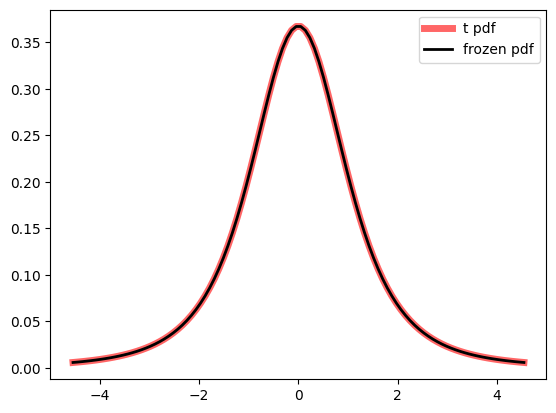

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.6, label='t pdf')
rv = t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.legend()

In [ ]:
# Check accuracy of cdf and ppf
vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

True

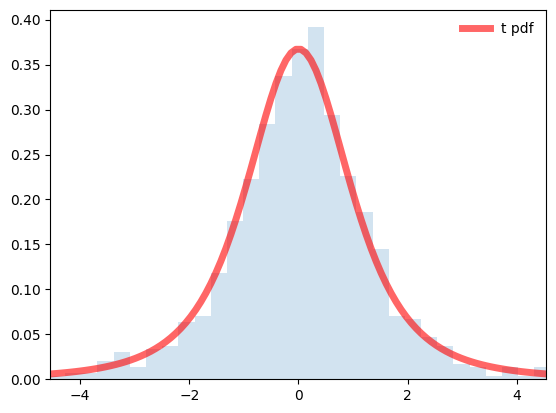

In [ ]:
# 100개의 랜덤한 값을 생성하여 pdf와 히스토그램과 비교
fig, ax = plt.subplots(1, 1)

r = t.rvs(df, size=1000)
ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.6, label='t pdf')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
q = [0.001, 0.5, 0.999]
vals = t.ppf([0.001, 0.5, 0.999], df)

print(f't분포에서 mean과 variance : {t.stats(df)}')             # t분포에서 mean, variance 값
print(f't분포에서 0.01이 되는 확률변수값 : {t.ppf(0.01,df)}')    # t분포에서 0.01이 되는 확률변수값
print(f't분포에서 0.99이 되는 확률변수값 : {t.ppf(0.99,df)}')    # t분포에서 0.99이 되는 확률변수값
print(f't확률밀도함수에서 x에서의 확률값: {t.pdf(q,df)}')        # 확률밀도함수
print(f't누적확률함수에서 x에서의 누적확률값 : {t.cdf(vals,df)}')    # 누적확률함수

print(f'''t분포에서 <ppf를 이용하여 {[0.001, 0.5, 0.999]}값을 가지는 X값>과 <확률변수 x의 cdf 확률값>이 같은지 :
    {np.allclose([0.001, 0.5, 0.999], t.cdf(vals,df))}''')                      # 두 행렬이 element-wise하게 같은지 비교

t분포에서 mean과 variance : (0.0, 3.0)
t분포에서 0.01이 되는 확률변수값 : -4.540702858698421
t분포에서 0.99이 되는 확률변수값 : 4.540702858698419
t확률밀도함수에서 x에서의 확률값: [2.87121585e-04 3.67552597e-01 2.87121585e-04]
t누적확률함수에서 x에서의 누적확률값 : [0.001 0.5   0.999]
t분포에서 <ppf를 이용하여 [0.001, 0.5, 0.999]값을 가지는 확률값>과 <확률변수 x의 cdf 확률값>이 같은지 : 
    True


In [ ]:
# 분위수 비교
print(f'{t.ppf(0.05, 7)}')
print(f'{t.ppf(0.95, 7)}')

-1.8945786050613054
1.894578605061305


##### 연습문제
1. 자유도 2인 t분포에 대해서 P(-2≤ X ≤2)의 확률을 계산하세요.
2. t분포에 대한 누적분포함수를 이용하여 확률이 0.95가 되는 분위수(확률변수 X)를 구하세요.

In [ ]:
# 1. 자유도 2인 t분포에 대해서 P(-2≤ X ≤2)의 확률을 계산하세요.
# code here




P(-2≤X≤2)= 0.816496580927726


In [ ]:
# 2. t분포에 대한 누적분포함수를 이용하여 확률이 0.95가 되는 분위수(확률변수 X)를 구하세요.
# code here




P(t≤k)=0.95, k= 2.919985580355516


- 7. F분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f

In [ ]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

In [ ]:
dfn, dfd = 29, 18
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

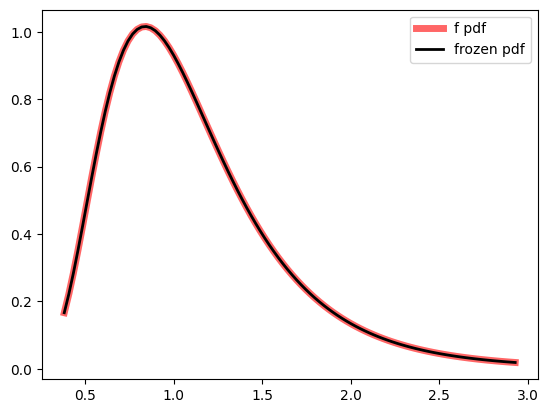

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')
rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.legend()

In [ ]:
vals = f.ppf([0.001, 0.5, 0.999], dfn, dfd)
np.allclose([0.001, 0.5, 0.999], f.cdf(vals, dfn, dfd))

True

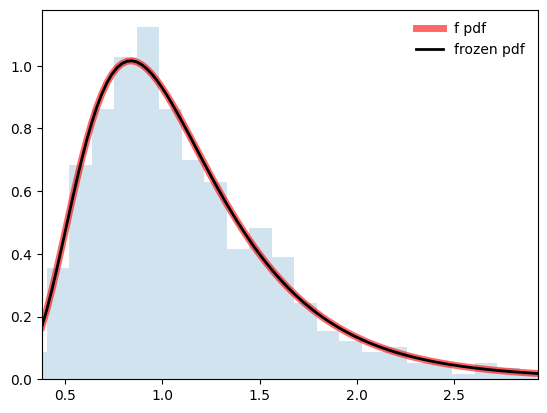

In [ ]:
# random하게 1000개 생성후 pdf와 histogram 비교
fig, ax = plt.subplots(1, 1)
r = f.rvs(dfn, dfd, size=1000)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
vals = f.ppf([0.001, 0.5, 0.999], dfn, dfd)

print(f'F분포에서 mean과 variance : {f.stats(dfn, dfd)}')             # F분포에서 mean, variance 값
print(f'F분포에서 0.01이 되는 확률변수값 : {f.ppf(0.01,dfn, dfd)}')    # F분포에서 0.01이 되는 확률변수값
print(f'F분포에서 0.99이 되는 확률변수값 : {f.ppf(0.99,dfn, dfd)}')    # F분포에서 0.99이 되는 확률변수값
print(f'F확률밀도함수에서 x에서의 확률값: {f.pdf(vals,dfn, dfd)}')        # 확률밀도함수
print(f'F누적확률함수에서 x에서의 누적확률값 : {f.cdf(vals,dfn, dfd)}')    # 누적확률함수

print(f'''F분포에서 <ppf를 이용하여 {[0.001, 0.5, 0.999]}값을 가지는 확률값>과 <확률변수 x의 cdf 확률값>이 같은지 :
    {np.allclose([0.001, 0.5, 0.999], f.cdf(vals,dfn, dfd))}''')                      # 두 행렬이 element-wise하게 같은지 비교

F분포에서 mean과 variance : (1.125, 0.2805572660098522)
F분포에서 0.01이 되는 확률변수값 : 0.38084718434477144
F분포에서 0.99이 되는 확률변수값 : 2.929762808060621
F확률밀도함수에서 x에서의 확률값: [0.02850897 0.91569303 0.00148003]
F누적확률함수에서 x에서의 누적확률값 : [0.001 0.5   0.999]
t분포에서 <ppf를 이용하여 [0.001, 0.5, 0.999]값을 가지는 확률값>과 <확률변수 x의 cdf 확률값>이 같은지 : 
    True


##### 연습문제
1. 자유도 29, 18인 F분포에 대해서 P(-2≤ X ≤2)의 확률을 계산하세요.
2. F분포에 대한 누적분포함수를 이용하여 확률이 0.95가 되는 분위수(확률변수 X)를 구하세요.

In [ ]:
# 1. 자유도 29, 18인 F분포에 대해서 P(-2≤ X ≤2)의 확률을 계산하세요.
# code here



P(-2≤X≤2)= 0.9365871584617912


In [ ]:
# 2. F분포에 대한 누적분포함수를 이용하여 확률이 0.95가 되는 분위수(확률변수 X)를 구하세요.
# code here



P(t≤k)=0.95, k= 2.1131065965798705
